This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

 

**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



Importing necessary libraries

In [3562]:
import pandas as pd
import numpy as np

In [3563]:
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking basic information about the input data

In [3564]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values observed, converting dteday to DateTime data object(Not required in this particular but following best practice).

In [3565]:
bikes.dteday=pd.to_datetime(bikes.dteday, dayfirst=True)

In [3566]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3567]:
# Importing standard Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

From the dataset we can see there are only 4 numerical independent variables i.e. 'temp','atemp','hum' and 'windspeed'. We can plot a scatter plot for these variables against our target variable which is 'cnt'.

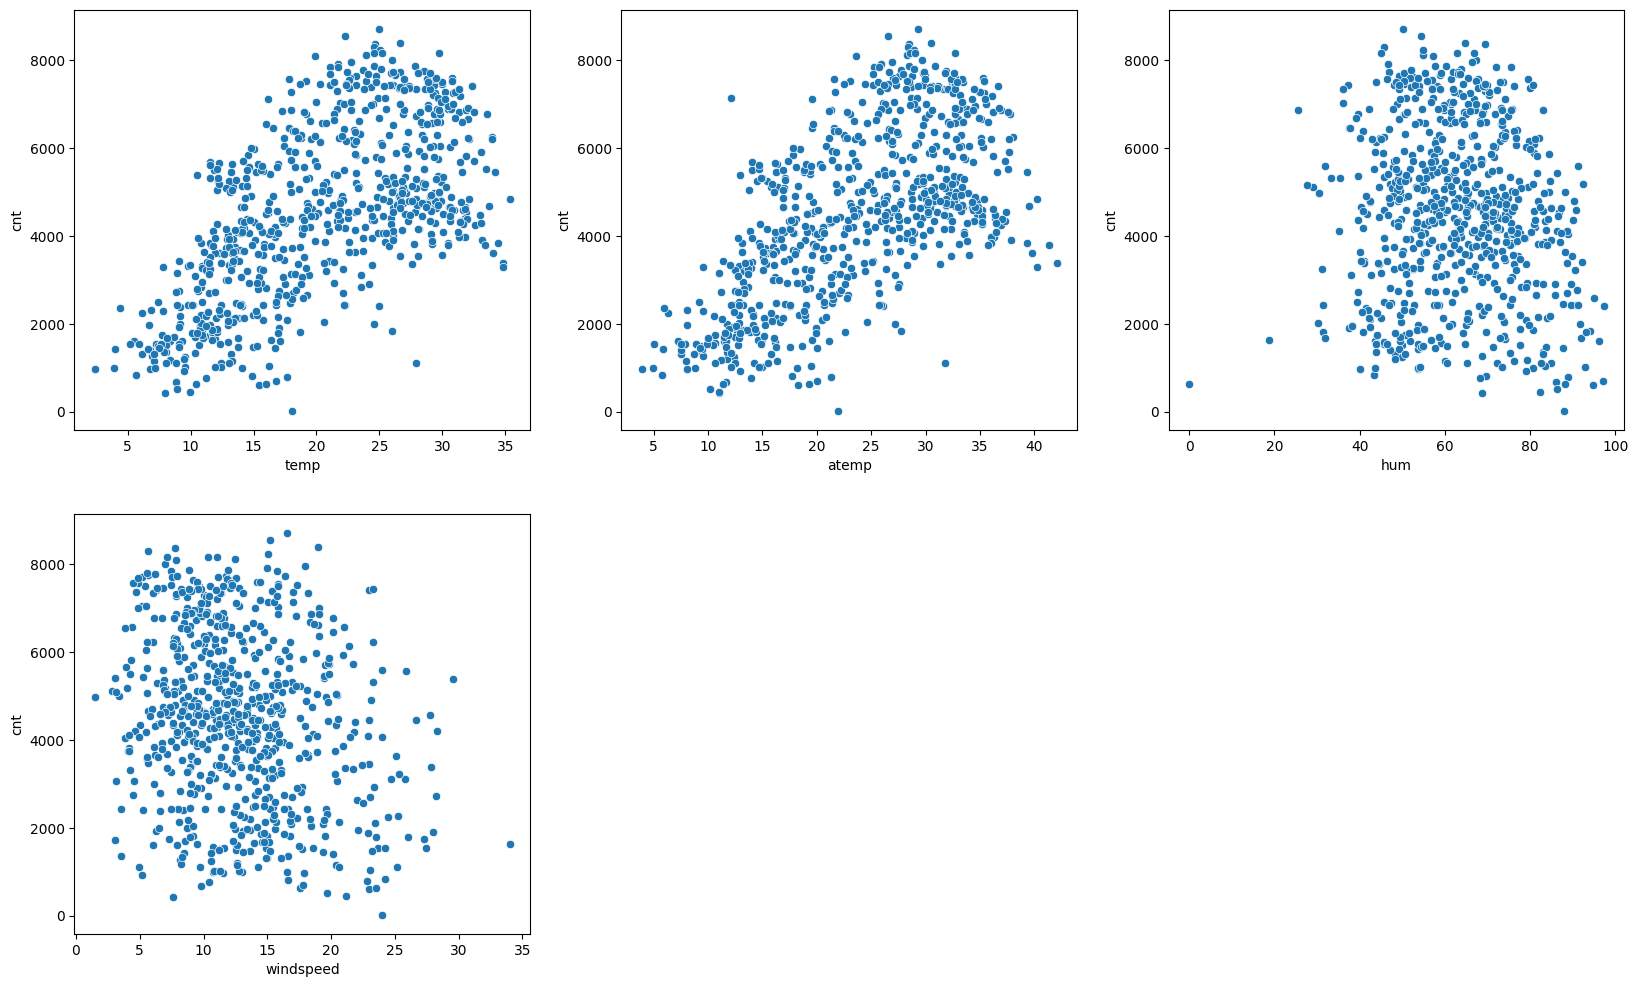

In [3568]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bikes)

plt.show()

For other categorical variable we can create box-plot to see outliers.

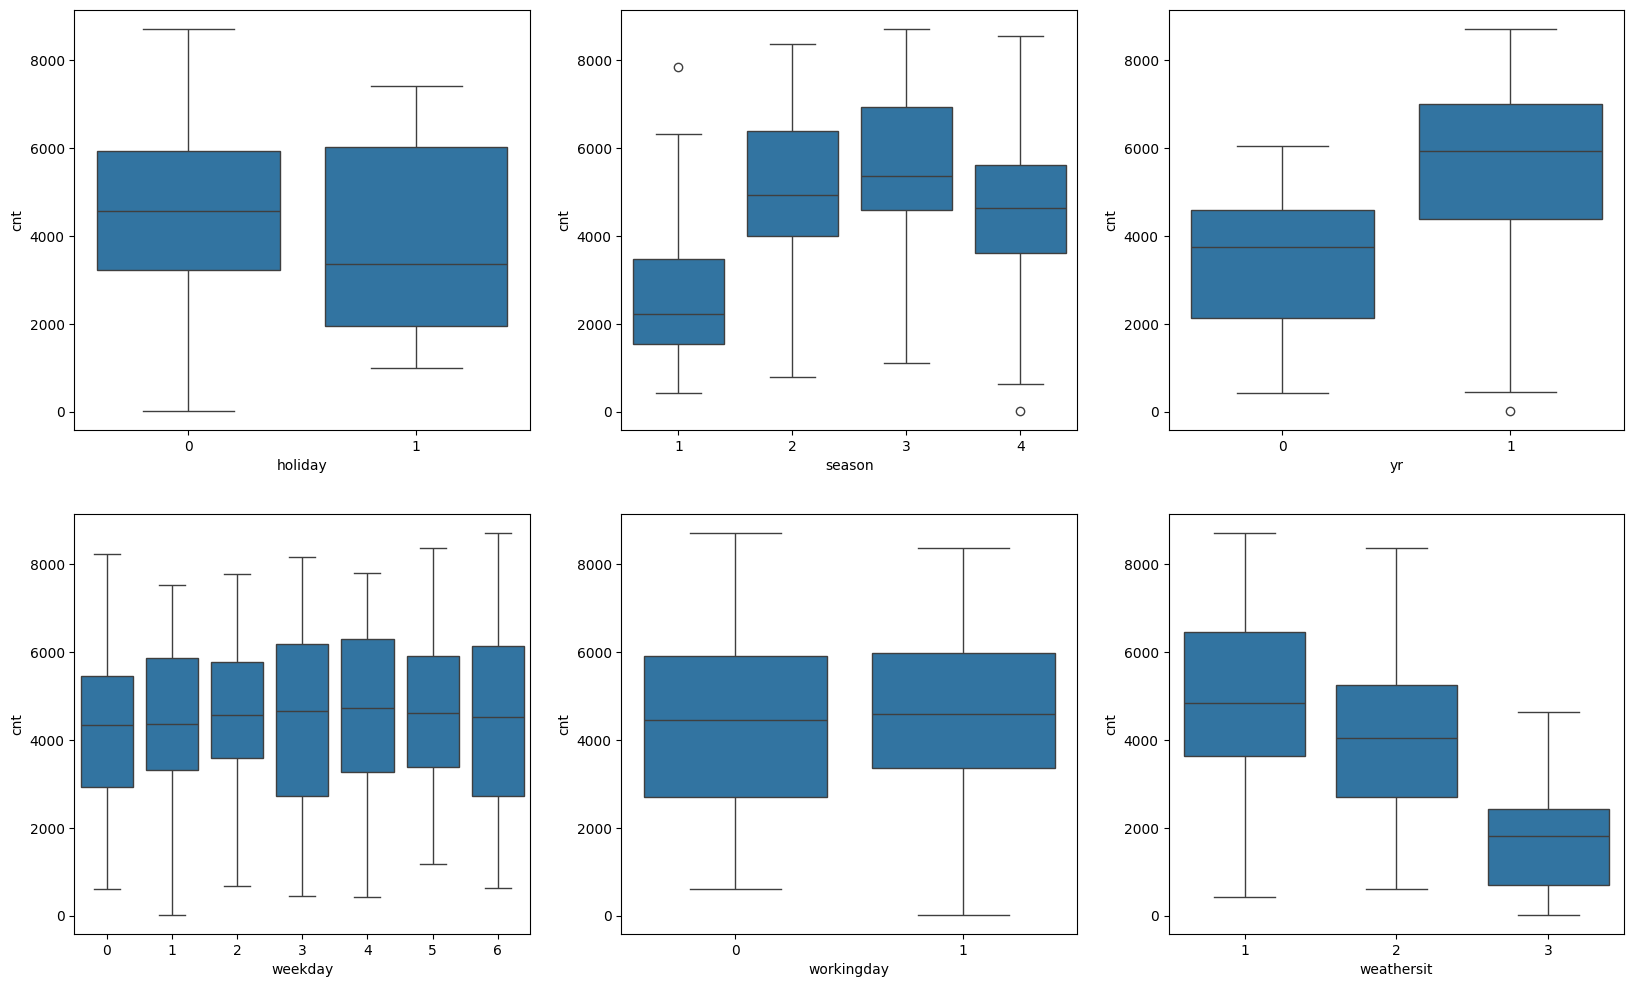

In [3569]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

## Data Preparation ##

Creating dummy values out of the ordinal categorical variables.

In [3570]:
# Mapping season variable based on the data dictionary.
season_map={1:'spring',2:'summer',3:'fall',4:'winter'}
bikes.season=bikes.season.map(season_map)

In [3571]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3572]:
# Creating map for other categorical variables based on data dictionary.
# Defining dictioaries
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
weekday_map={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'}
weather_map={1:'Clear',2:'Mist',3:'Snow',4:'Heavy_Rain'}

In [3573]:
# Using map fucntion to transform the column.
bikes.mnth=bikes.mnth.map(month_map)
bikes.weekday=bikes.weekday.map(weekday_map)
bikes.weathersit=bikes.weathersit.map(weather_map)

In [3574]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Creating dummy variables for the transformed categorical variables**

In [3575]:
#Creating separate data frames for each column using 'get_dummies' function and merging it with the original 'bikes' data frame.
# drop_first=True will drop the reduntant column, as it can be identified by using other column values.
season=pd.get_dummies(bikes['season'],drop_first=True,dtype=int)
bikes=pd.concat([bikes, season],axis=1)
month=pd.get_dummies(bikes['mnth'],drop_first=True,dtype=int)
bikes=pd.concat([bikes,month],axis=1)
weekday=pd.get_dummies(bikes['weekday'],drop_first=True,dtype=int)
bikes=pd.concat([bikes,weekday],axis=1)
weather=pd.get_dummies(bikes['weathersit'],drop_first=True,dtype=int)
bikes=pd.concat([bikes,weather],axis=1)

In [3576]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Mist,Snow
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist,14.110847,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-01-02,spring,0,Jan,0,Sun,0,Mist,14.902598,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-01-03,spring,0,Jan,0,Mon,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,spring,0,Jan,0,Tue,1,Clear,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-01-05,spring,0,Jan,0,Wed,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [3577]:
# Dropping the columns which are no longer required, including the columns from which we have derived dummy columns.
bikes=bikes.drop(columns=['instant','dteday','season','mnth','weekday','weathersit','casual','registered'])

In [3578]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Mist,Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


**Rescaling the Features**

In [3579]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3580]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [3581]:
#checking the re-scaled column
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Mist,Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


Plotting the correlation heatmap with all the variables

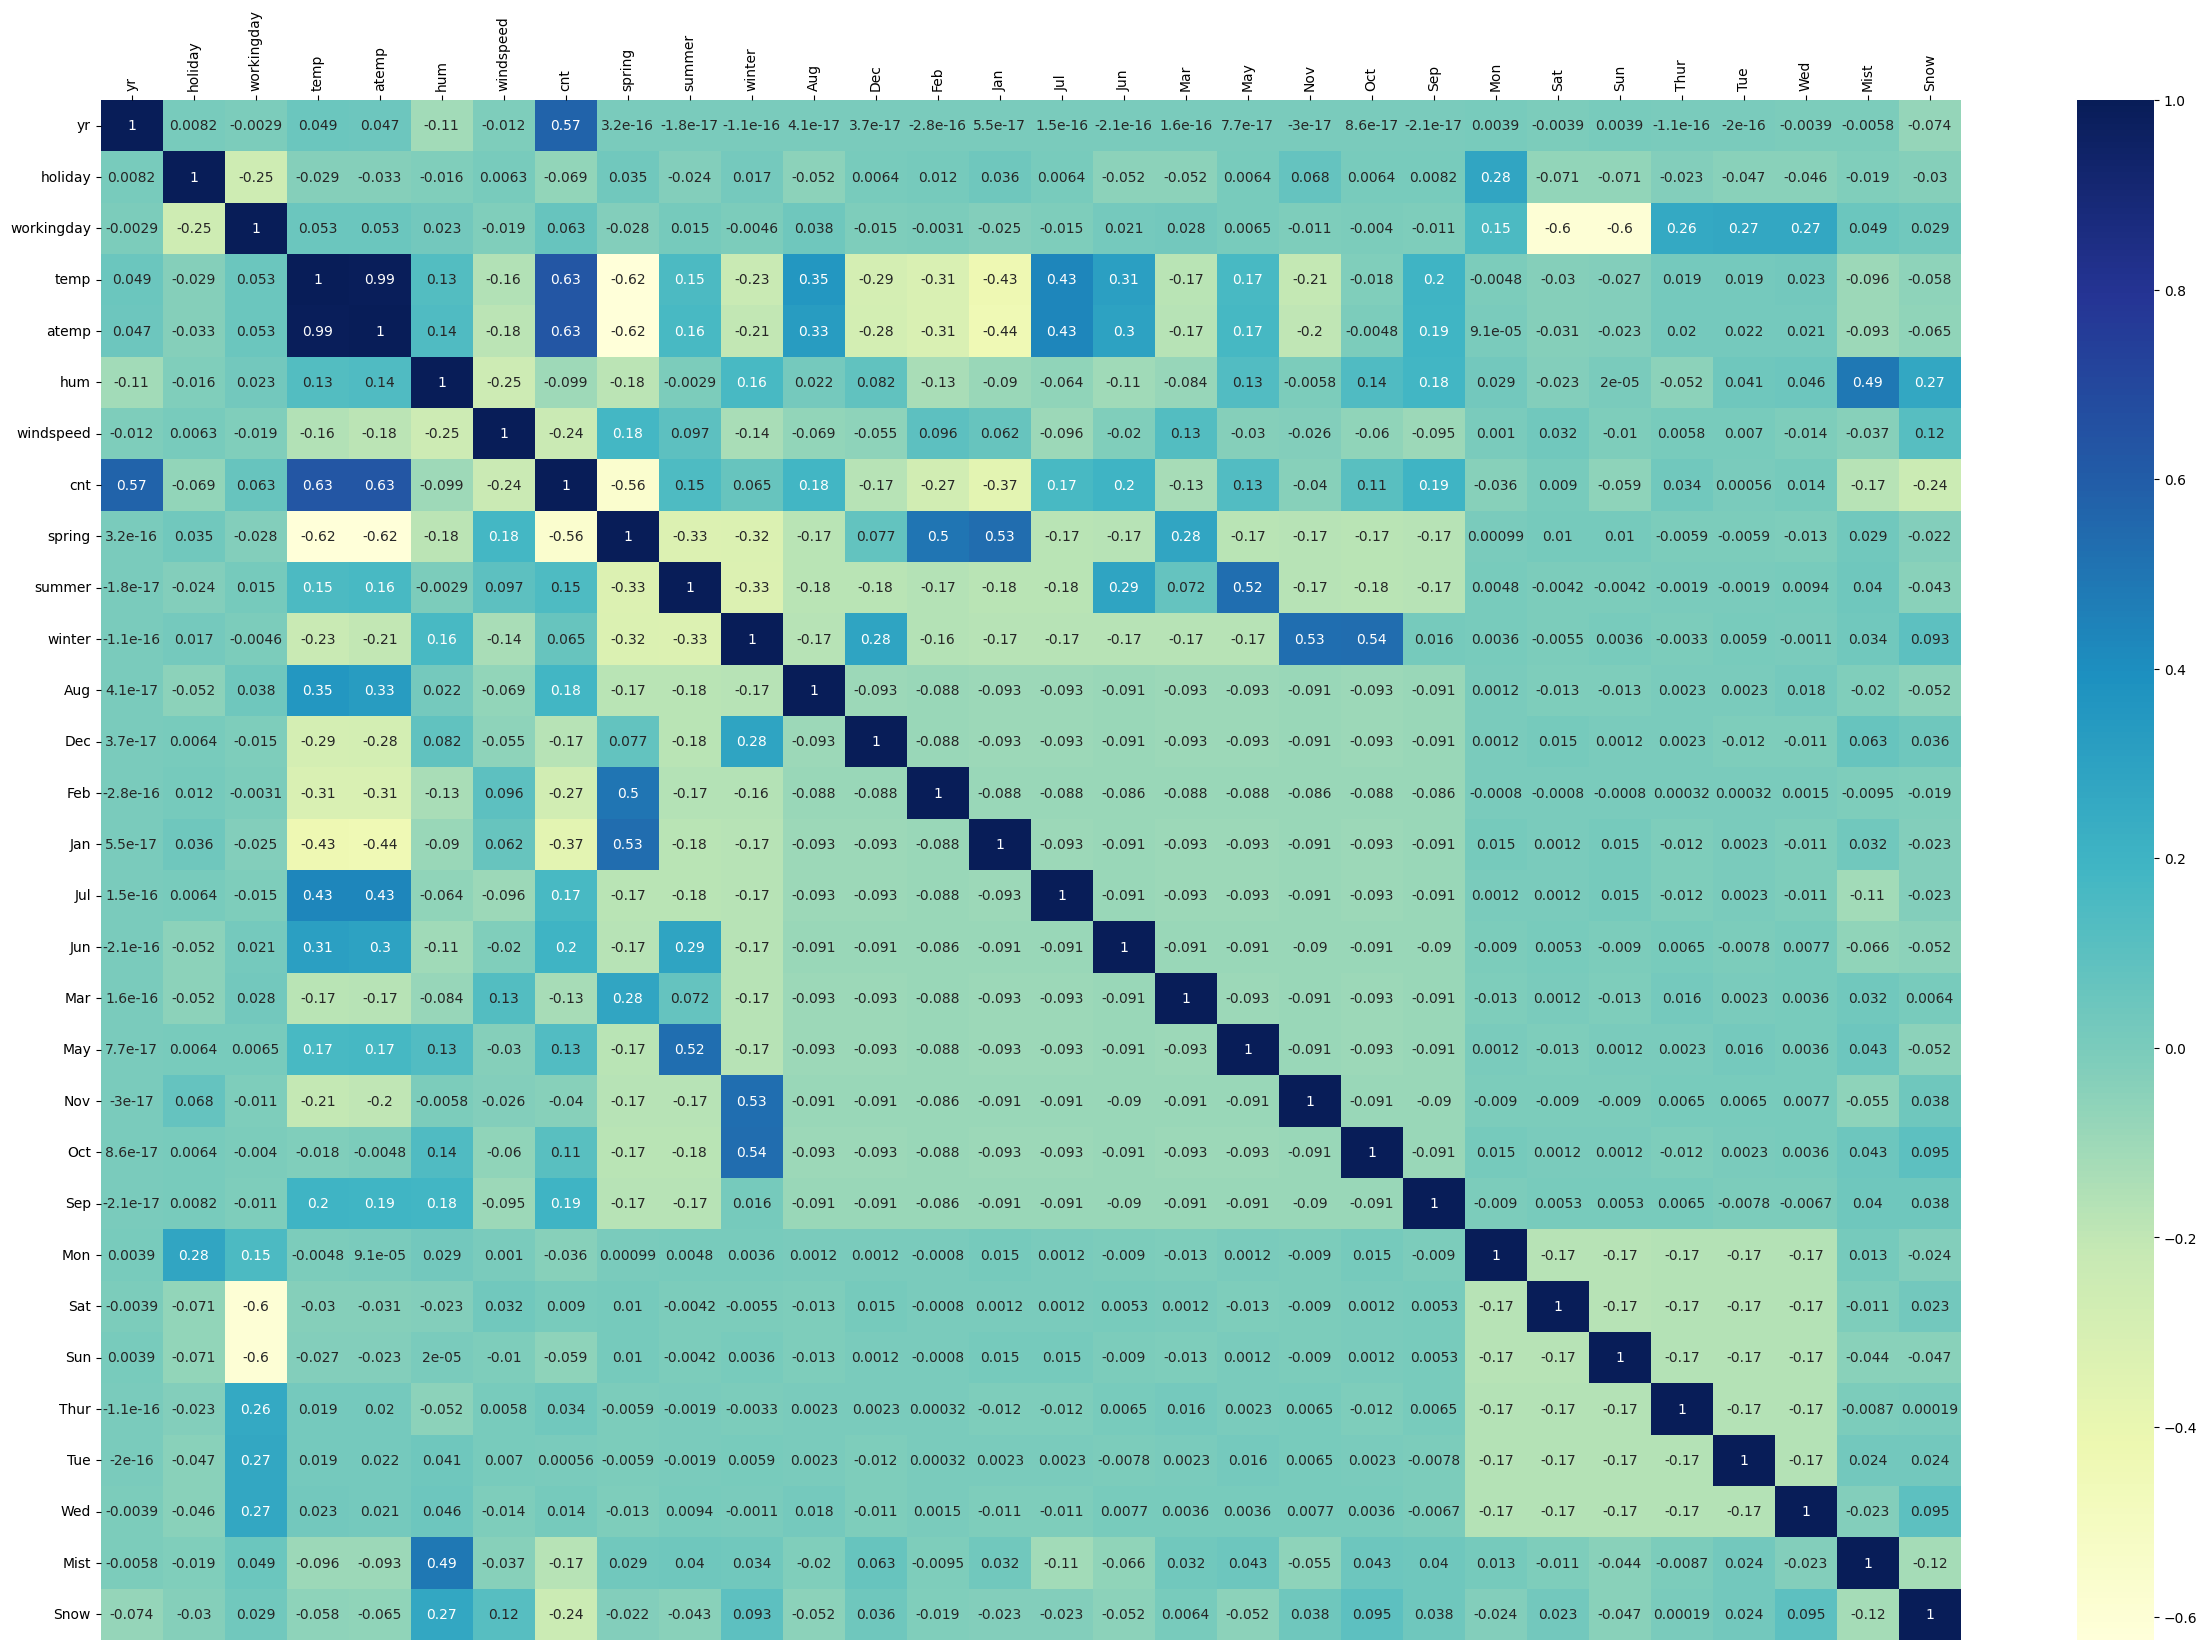

In [3582]:
plt.figure(figsize=(30,20))
ax=sns.heatmap(bikes.corr(),annot=True,cmap="YlGnBu")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

# Observations:
* cnt has strong positive correaltion with temp, atemp and yr vairables
* temp and atemp are strongly correlated and either of them should be part of the regression model(Rules of Linear regression)

Plotting the scatter plot of the identified significant independent variable with dependent variables.

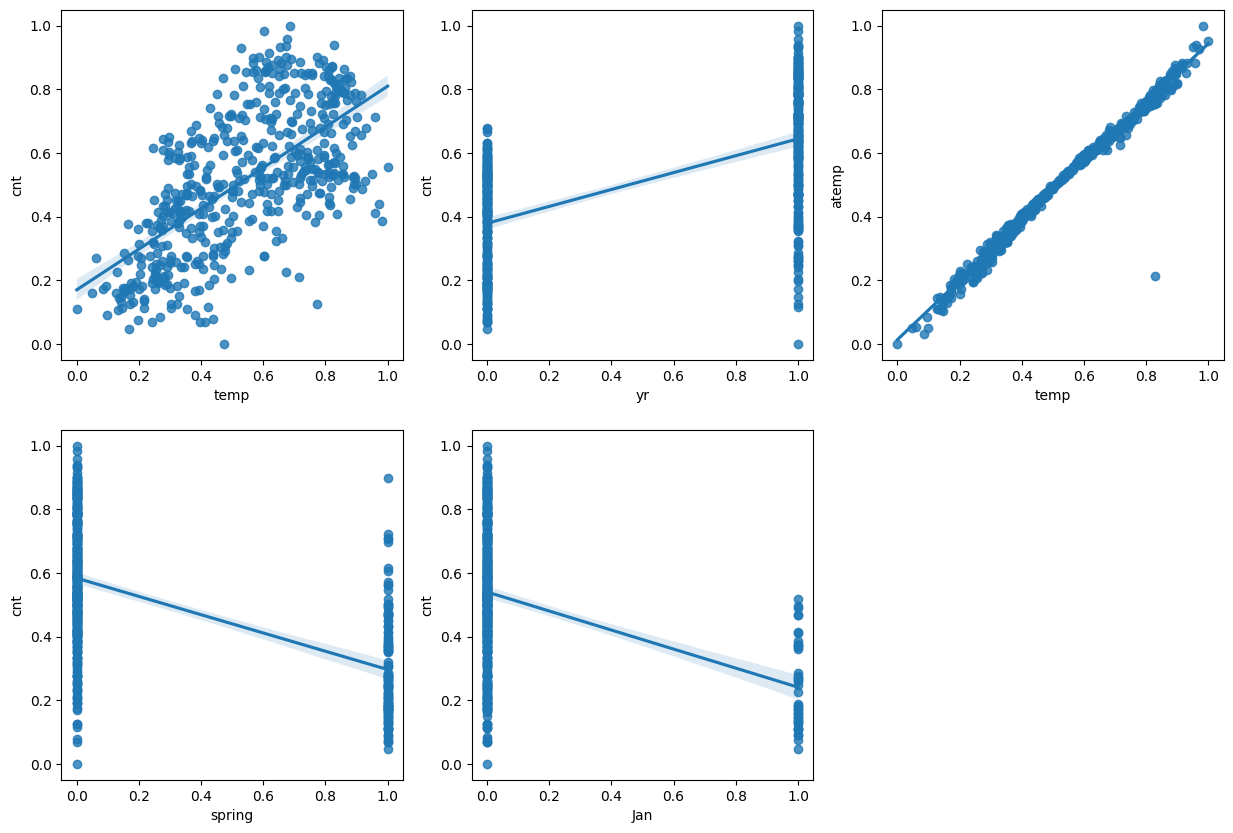

In [3583]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.regplot(x='temp',y='cnt',data=bike_train)
plt.subplot(2,3,2)
sns.regplot(x='yr',y='cnt',data=bike_train)
plt.subplot(2,3,3)
sns.regplot(x='temp',y='atemp',data=bike_train)
plt.subplot(2,3,4)
sns.regplot(x='spring',y='cnt',data=bike_train)
plt.subplot(2,3,5)
sns.regplot(x='Jan',y='cnt',data=bike_train)
plt.show()

**Start regression model with temp as the starting point**

In [3584]:
y_train=bike_train.pop('cnt')
x_train=bike_train

In [3585]:
# Importing statsmodel api
import statsmodels.api as sm


In [3586]:
# Adding constants to the x_train as statsmodel will not add the constant variable on its own
x_train_lm = sm.add_constant(x_train['temp'])
x_train_lm.head()

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666


In [3587]:
# Creating the firsr linear regression model
lr=sm.OLS(y_train,x_train_lm).fit()

In [3588]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           5.80e-61
Time:                        19:47:49   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

**By only doing a simple linear regression on temp variable we see that the R-squared is not very high**

**Now adding yr to the independent variables**

In [3589]:
x_train_lm = sm.add_constant(x_train[['temp','yr']])


In [3590]:
lr=sm.OLS(y_train,x_train_lm).fit()

In [3591]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.25e-130
Time:                        19:47:49   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

**With temp and yr we can see that the R-squared value is improved, but we can add more variables**

**As observed previously, derived binary variable Jan and Spring have significant negative correlation with cnt. We can add and check if it improves the result.**

In [3592]:
x_train_lm=sm.add_constant(x_train[['temp','yr','spring','Jan']])

In [3593]:
lr=sm.OLS(y_train,x_train_lm).fit()

In [3594]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.08e-146
Time:                        19:47:49   Log-Likelihood:                 381.88
No. Observations:                 510   AIC:                            -753.8
Df Residuals:                     505   BIC:                            -732.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2077      0.019     10.966      0.000       0.171       0.245
temp           0.4077      0.029     14.069      0.000       0.351       0.465
yr             0.2413      0.010     23.530      0.000       0.221       0.261
spring        -0.1327      0.016     -8.186      0.000      -0.165      -0.101
Jan           -0.0391      0.022     -1.791      0.074      -0.082       0.004
==============================================================================
Omnibus:                      105.790   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.723
Skew:                          -1.006   Prob(JB):                     4.50e-64
Kurtosis:                       6.112   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see the R-Squared value has improved by adding 'Jan' and 'spring' in the regression model. One thing to also observe is that the p-value for Jan is high, which could mean it can be insignificant in the presence of other variables**


Adding all the available independent variables into the model

In [3595]:
x_train_lm=sm.add_constant(x_train)

In [3596]:
lr=sm.OLS(y_train,x_train_lm).fit()

In [3597]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.42e-181
Time:                        19:47:49   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.000       0.176       0.315
yr             0.2322      0.008     28.792      0.000       0.216       0.248
holiday        0.0107      0.024      0.443      0.658      -0.037       0.058
workingday     0.0970      0.012      7.903      0.000       0.073       0.121
temp           0.4013      0.142      2.821      0.005       0.122       0.681
atemp          0.0506      0.138      0.366      0.714      -0.221       0.322
hum           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer         0.0382      0.026      1.455      0.146      -0.013       0.090
winter         0.1054      0.028      3.770      0.000       0.050       0.160
Aug            0.0161      0.034      0.473      0.637      -0.051       0.083
Dec           -0.0456      0.034     -1.356      0.176      -0.112       0.020
Feb           -0.0322      0.033     -0.978      0.329      -0.097       0.032
Jan           -0.0626      0.034     -1.864      0.063      -0.129       0.003
Jul           -0.0393      0.035     -1.116      0.265      -0.108       0.030
Jun           -0.0017      0.025     -0.067      0.946      -0.051       0.048
Mar            0.0013      0.025      0.052      0.958      -0.047       0.050
May            0.0247      0.021      1.169      0.243      -0.017       0.066
Nov           -0.0418      0.036     -1.149      0.251      -0.113       0.030
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0818      0.032      2.549      0.011       0.019       0.145
Mon           -0.0215      0.015     -1.395      0.164      -0.052       0.009
Sat            0.0961      0.014      6.984      0.000       0.069       0.123
Sun            0.0415      0.014      2.974      0.003       0.014       0.069
Thur          -0.0097      0.016     -0.625      0.532      -0.040       0.021
Tue           -0.0193      0.016     -1.242      0.215      -0.050       0.011
Wed           -0.0057      0.015     -0.384      0.701      -0.035       0.024
Mist          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
Snow          -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     9.50e+15
==============================================================================

N

* Adding all the variables improves the R-squared value significantly but we can see many independent variables have high p-value which means they can be insignificant in presence of other variables.
* We will calculate VIF and eliminate variables having high p-value and VIF more than 5.

In [3598]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3599]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
22,Sat,19.72
23,Sun,18.35
7,spring,10.80
9,winter,9.52
8,summer,8.31
18,Nov,6.80
19,Oct,6.59


## Dropping the variable and updating the model ##

From the p-values and VIF we can see that the atemp variable is insignificant as both the parameters are high. This was also comfirmed by the the previous correlation heatmap. We will drop atemp and do calculation again.

In [3600]:
X=x_train.drop('atemp',axis=1)

In [3601]:
x_train_lm=sm.add_constant(X)

In [3602]:
lr1=sm.OLS(y_train,x_train_lm).fit()

In [3603]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.74e-182
Time:                        19:47:50   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.035      6.955      0.000       0.176       0.314
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday        0.0100      0.024      0.415      0.678      -0.037       0.057
workingday     0.0969      0.012      7.905      0.000       0.073       0.121
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer         0.0387      0.026      1.478      0.140      -0.013       0.090
winter         0.1058      0.028      3.794      0.000       0.051       0.161
Aug            0.0144      0.034      0.428      0.669      -0.052       0.081
Dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
Jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar            0.0010      0.025      0.043      0.966      -0.047       0.049
May            0.0239      0.021      1.140      0.255      -0.017       0.065
Nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct            0.0075      0.036      0.211      0.833      -0.063       0.078
Sep            0.0811      0.032      2.533      0.012       0.018       0.144
Mon           -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat            0.0964      0.014      7.029      0.000       0.069       0.123
Sun            0.0419      0.014      3.006      0.003       0.014       0.069
Thur          -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue           -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed           -0.0054      0.015     -0.362      0.718      -0.035       0.024
Mist          -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Snow          -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     9.02e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [3604]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
21,Sat,19.72
22,Sun,18.35
6,spring,10.79
8,winter,9.50
7,summer,8.29
3,temp,7.12
17,Nov,6.80
18,Oct,6.59
9,Aug,6.43


## Dropping the variable and updating the model ##

* workingday has a high VIF and 0.00 which means the variable is significant but has high colinearity among other variable which makes sense.The workingday variable is highly correlated with the weekday dummy variables. For example, if weekday is 0 (Sunday) or 6 (Saturday), workingday will always be 0. 
* We will follow the described approach for each differnt model :
* Drop features having high p-values and VIF one by one and see the affect on the model. First priority given to p-value then VIF.

In [3605]:
X=X.drop('spring', axis=1)

In [3606]:
x_train_lm=sm.add_constant(X)

In [3607]:
lr2=sm.OLS(y_train,x_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.99e-182
Time:                        19:47:50   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.032      6.912      0.000       0.158       0.284
yr             0.2318      0.008     28.742      0.000       0.216       0.248
holiday        0.0035      0.024      0.149      0.881      -0.043       0.050
workingday     0.0915      0.012      7.749      0.000       0.068       0.115
temp           0.4598      0.046      9.993      0.000       0.369       0.550
hum           -0.1537      0.039     -3.992      0.000      -0.229      -0.078
windspeed     -0.1897      0.026     -7.396      0.000      -0.240      -0.139
summer         0.0663      0.020      3.345      0.001       0.027       0.105
winter         0.1328      0.022      5.941      0.000       0.089       0.177
Aug            0.0389      0.030      1.292      0.197      -0.020       0.098
Dec           -0.0501      0.034     -1.496      0.135      -0.116       0.016
Feb           -0.0510      0.031     -1.657      0.098      -0.112       0.009
Jan           -0.0810      0.032     -2.563      0.011      -0.143      -0.019
Jul           -0.0165      0.032     -0.518      0.605      -0.079       0.046
Jun            0.0044      0.025      0.177      0.859      -0.044       0.053
Mar           -0.0115      0.023     -0.495      0.621      -0.057       0.034
May            0.0223      0.021      1.064      0.288      -0.019       0.064
Nov           -0.0405      0.036     -1.112      0.267      -0.112       0.031
Oct            0.0076      0.036      0.213      0.831      -0.063       0.078
Sep            0.1005      0.030      3.390      0.001       0.042       0.159
Mon           -0.0204      0.015     -1.332      0.183      -0.051       0.010
Sat            0.0901      0.013      6.843      0.000       0.064       0.116
Sun            0.0360      0.013      2.676      0.008       0.010       0.062
Thur          -0.0089      0.016     -0.570      0.569      -0.039       0.022
Tue           -0.0189      0.016     -1.215      0.225      -0.049       0.012
Wed           -0.0058      0.015     -0.392      0.695      -0.035       0.023
Mist          -0.0605      0.010     -5.793      0.000      -0.081      -0.040
Snow          -0.2546      0.026     -9.677      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                     8.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-29. This might indicate

In [3608]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,70.92
20,Sat,16.17
21,Sun,15.16
3,temp,7.01
16,Nov,6.79
17,Oct,6.59
7,winter,6.08
9,Dec,5.64
11,Jan,5.23
8,Aug,5.11


In [3609]:
X=X.drop('Nov',axis=1)

In [3610]:
x_train_lm=sm.add_constant(X)
lr3=sm.OLS(y_train,x_train_lm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.16e-183
Time:                        19:47:50   Log-Likelihood:                 525.94
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     484   BIC:                            -889.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2044      0.028      7.249      0.000       0.149       0.260
yr             0.2320      0.008     28.761      0.000       0.216       0.248
holiday       -0.0031      0.023     -0.136      0.892      -0.048       0.042
workingday     0.0882      0.011      7.714      0.000       0.066       0.111
temp           0.4694      0.045     10.389      0.000       0.381       0.558
hum           -0.1587      0.038     -4.148      0.000      -0.234      -0.084
windspeed     -0.1900      0.026     -7.406      0.000      -0.240      -0.140
summer         0.0786      0.016      4.783      0.000       0.046       0.111
winter         0.1177      0.018      6.626      0.000       0.083       0.153
Aug            0.0546      0.027      2.054      0.041       0.002       0.107
Dec           -0.0192      0.019     -1.027      0.305      -0.056       0.018
Feb           -0.0306      0.025     -1.238      0.216      -0.079       0.018
Jan           -0.0597      0.025     -2.374      0.018      -0.109      -0.010
Jul           -0.0015      0.029     -0.052      0.958      -0.058       0.055
Jun            0.0123      0.024      0.521      0.603      -0.034       0.059
Mar            0.0032      0.019      0.169      0.866      -0.034       0.041
May            0.0274      0.021      1.335      0.182      -0.013       0.068
Oct            0.0414      0.019      2.168      0.031       0.004       0.079
Sep            0.1210      0.023      5.202      0.000       0.075       0.167
Mon           -0.0201      0.015     -1.314      0.189      -0.050       0.010
Sat            0.0866      0.013      6.773      0.000       0.061       0.112
Sun            0.0326      0.013      2.488      0.013       0.007       0.058
Thur          -0.0097      0.016     -0.627      0.531      -0.040       0.021
Tue           -0.0190      0.016     -1.221      0.223      -0.049       0.012
Wed           -0.0062      0.015     -0.417      0.677      -0.036       0.023
Mist          -0.0600      0.010     -5.748      0.000      -0.080      -0.039
Snow          -0.2539      0.026     -9.651      0.000      -0.306      -0.202
==============================================================================
Omnibus:                       82.618   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.962
Skew:                          -0.797   Prob(JB):                     3.84e-49
Kurtosis:                       5.820   Cond. No.                     8.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [3611]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,56.50
19,Sat,12.78
20,Sun,12.07
3,temp,6.76
8,Aug,3.99
7,winter,3.84
12,Jul,3.81
11,Jan,3.31
6,summer,3.25
1,holiday,3.17


In [3612]:
X=X.drop('Jul',axis=1)

In [3613]:
x_train_lm=sm.add_constant(X)
lr4=sm.OLS(y_train,x_train_lm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.74e-184
Time:                        19:47:51   Log-Likelihood:                 525.94
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -896.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.028      7.263      0.000       0.149       0.260
yr             0.2320      0.008     28.923      0.000       0.216       0.248
holiday       -0.0030      0.023     -0.132      0.895      -0.048       0.042
workingday     0.0882      0.011      7.744      0.000       0.066       0.111
temp           0.4680      0.036     12.904      0.000       0.397       0.539
hum           -0.1585      0.038     -4.171      0.000      -0.233      -0.084
windspeed     -0.1899      0.025     -7.472      0.000      -0.240      -0.140
summer         0.0790      0.015      5.387      0.000       0.050       0.108
winter         0.1180      0.016      7.154      0.000       0.086       0.150
Aug            0.0556      0.017      3.214      0.001       0.022       0.090
Dec           -0.0191      0.018     -1.033      0.302      -0.055       0.017
Feb           -0.0303      0.024     -1.265      0.206      -0.077       0.017
Jan           -0.0595      0.025     -2.403      0.017      -0.108      -0.011
Jun            0.0131      0.018      0.712      0.477      -0.023       0.049
Mar            0.0036      0.018      0.201      0.840      -0.031       0.039
May            0.0278      0.019      1.491      0.137      -0.009       0.065
Oct            0.0417      0.018      2.301      0.022       0.006       0.077
Sep            0.1218      0.017      7.066      0.000       0.088       0.156
Mon           -0.0202      0.015     -1.317      0.188      -0.050       0.010
Sat            0.0865      0.013      6.810      0.000       0.062       0.112
Sun            0.0326      0.013      2.495      0.013       0.007       0.058
Thur          -0.0097      0.015     -0.626      0.532      -0.040       0.021
Tue           -0.0190      0.016     -1.222      0.222      -0.049       0.012
Wed           -0.0062      0.015     -0.416      0.678      -0.035       0.023
Mist          -0.0600      0.010     -5.770      0.000      -0.080      -0.040
Snow          -0.2540      0.026     -9.684      0.000      -0.306      -0.202
==============================================================================
Omnibus:                       82.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.959
Skew:                          -0.798   Prob(JB):                     2.33e-49
Kurtosis:                       5.827   Cond. No.                     8.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [3614]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,56.26
18,Sat,12.70
19,Sun,12.01
3,temp,4.36
7,winter,3.32
11,Jan,3.21
1,holiday,3.17
6,summer,2.59
10,Feb,2.32
4,hum,2.00


In [3615]:
X=X.drop('Mar',axis=1)

In [3616]:
x_train_lm=sm.add_constant(X)
lr5=sm.OLS(y_train,x_train_lm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.33e-185
Time:                        19:47:51   Log-Likelihood:                 525.92
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2066      0.026      8.085      0.000       0.156       0.257
yr             0.2321      0.008     29.006      0.000       0.216       0.248
holiday       -0.0026      0.023     -0.116      0.908      -0.047       0.042
workingday     0.0888      0.011      8.188      0.000       0.068       0.110
temp           0.4646      0.032     14.501      0.000       0.402       0.528
hum           -0.1579      0.038     -4.173      0.000      -0.232      -0.084
windspeed     -0.1898      0.025     -7.478      0.000      -0.240      -0.140
summer         0.0783      0.014      5.498      0.000       0.050       0.106
winter         0.1165      0.015      8.021      0.000       0.088       0.145
Aug            0.0548      0.017      3.255      0.001       0.022       0.088
Dec           -0.0204      0.017     -1.173      0.241      -0.054       0.014
Feb           -0.0327      0.021     -1.590      0.112      -0.073       0.008
Jan           -0.0622      0.021     -3.011      0.003      -0.103      -0.022
Jun            0.0127      0.018      0.695      0.487      -0.023       0.049
May            0.0272      0.018      1.480      0.140      -0.009       0.063
Oct            0.0415      0.018      2.297      0.022       0.006       0.077
Sep            0.1210      0.017      7.228      0.000       0.088       0.154
Mon           -0.0201      0.015     -1.316      0.189      -0.050       0.010
Sat            0.0873      0.012      7.155      0.000       0.063       0.111
Sun            0.0332      0.013      2.606      0.009       0.008       0.058
Thur          -0.0096      0.015     -0.621      0.535      -0.040       0.021
Tue           -0.0190      0.015     -1.224      0.222      -0.049       0.011
Wed           -0.0062      0.015     -0.414      0.679      -0.035       0.023
Mist          -0.0601      0.010     -5.782      0.000      -0.080      -0.040
Snow          -0.2542      0.026     -9.706      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       83.311   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.391
Skew:                          -0.800   Prob(JB):                     4.20e-50
Kurtosis:                       5.854   Cond. No.                     8.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [3617]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,46.21
17,Sat,10.37
18,Sun,10.04
3,temp,3.41
1,holiday,2.86
7,winter,2.57
6,summer,2.45
11,Jan,2.25
4,hum,1.98
16,Mon,1.96


In [3618]:
X=X.drop('holiday', axis=1)

In [3619]:
x_train_lm=sm.add_constant(X)
lr6=sm.OLS(y_train,x_train_lm).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.33e-185
Time:                        19:47:51   Log-Likelihood:                 525.92
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2040      0.041      4.919      0.000       0.123       0.285
yr             0.2321      0.008     29.006      0.000       0.216       0.248
workingday     0.0915      0.026      3.491      0.001       0.040       0.143
temp           0.4646      0.032     14.501      0.000       0.402       0.528
hum           -0.1579      0.038     -4.173      0.000      -0.232      -0.084
windspeed     -0.1898      0.025     -7.478      0.000      -0.240      -0.140
summer         0.0783      0.014      5.498      0.000       0.050       0.106
winter         0.1165      0.015      8.021      0.000       0.088       0.145
Aug            0.0548      0.017      3.255      0.001       0.022       0.088
Dec           -0.0204      0.017     -1.173      0.241      -0.054       0.014
Feb           -0.0327      0.021     -1.590      0.112      -0.073       0.008
Jan           -0.0622      0.021     -3.011      0.003      -0.103      -0.022
Jun            0.0127      0.018      0.695      0.487      -0.023       0.049
May            0.0272      0.018      1.480      0.140      -0.009       0.063
Oct            0.0415      0.018      2.297      0.022       0.006       0.077
Sep            0.1210      0.017      7.228      0.000       0.088       0.154
Mon           -0.0201      0.015     -1.316      0.189      -0.050       0.010
Sat            0.0899      0.030      3.020      0.003       0.031       0.148
Sun            0.0358      0.030      1.198      0.231      -0.023       0.094
Thur          -0.0096      0.015     -0.621      0.535      -0.040       0.021
Tue           -0.0190      0.015     -1.224      0.222      -0.049       0.011
Wed           -0.0062      0.015     -0.414      0.679      -0.035       0.023
Mist          -0.0601      0.010     -5.782      0.000      -0.080      -0.040
Snow          -0.2542      0.026     -9.706      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       83.311   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.391
Skew:                          -0.800   Prob(JB):                     4.20e-50
Kurtosis:                       5.854   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3620]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,32.91
2,temp,19.47
1,workingday,18.46
16,Sat,5.28
17,Sun,5.13
4,windspeed,4.69
6,winter,3.21
5,summer,3.12
21,Mist,2.32
20,Wed,2.23


In [3621]:
X=X.drop('Wed', axis=1)

In [3622]:
x_train_lm=sm.add_constant(X)
lr7=sm.OLS(y_train,x_train_lm).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.12e-186
Time:                        19:47:51   Log-Likelihood:                 525.83
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     487   BIC:                            -908.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2012      0.041      4.921      0.000       0.121       0.282
yr             0.2320      0.008     29.028      0.000       0.216       0.248
workingday     0.0912      0.026      3.484      0.001       0.040       0.143
temp           0.4650      0.032     14.529      0.000       0.402       0.528
hum           -0.1587      0.038     -4.203      0.000      -0.233      -0.084
windspeed     -0.1899      0.025     -7.486      0.000      -0.240      -0.140
summer         0.0782      0.014      5.497      0.000       0.050       0.106
winter         0.1163      0.015      8.020      0.000       0.088       0.145
Aug            0.0548      0.017      3.255      0.001       0.022       0.088
Dec           -0.0201      0.017     -1.159      0.247      -0.054       0.014
Feb           -0.0326      0.021     -1.589      0.113      -0.073       0.008
Jan           -0.0623      0.021     -3.014      0.003      -0.103      -0.022
Jun            0.0124      0.018      0.679      0.497      -0.023       0.048
May            0.0271      0.018      1.475      0.141      -0.009       0.063
Oct            0.0418      0.018      2.313      0.021       0.006       0.077
Sep            0.1208      0.017      7.226      0.000       0.088       0.154
Mon           -0.0167      0.013     -1.298      0.195      -0.042       0.009
Sat            0.0930      0.029      3.234      0.001       0.037       0.150
Sun            0.0389      0.029      1.349      0.178      -0.018       0.096
Thur          -0.0062      0.013     -0.473      0.636      -0.032       0.019
Tue           -0.0155      0.013     -1.186      0.236      -0.041       0.010
Mist          -0.0598      0.010     -5.772      0.000      -0.080      -0.039
Snow          -0.2549      0.026     -9.760      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       82.704   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.606
Skew:                          -0.794   Prob(JB):                     1.02e-49
Kurtosis:                       5.845   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3623]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,32.25
2,temp,19.45
1,workingday,17.96
16,Sat,5.08
17,Sun,4.92
4,windspeed,4.66
6,winter,3.19
5,summer,3.11
20,Mist,2.30
10,Jan,2.13


In [3624]:
X=X.drop('Thur', axis=1)

In [3625]:
x_train_lm=sm.add_constant(X)
lr8=sm.OLS(y_train,x_train_lm).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.93e-187
Time:                        19:47:52   Log-Likelihood:                 525.71
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -914.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1984      0.040      4.909      0.000       0.119       0.278
yr             0.2320      0.008     29.050      0.000       0.216       0.248
workingday     0.0917      0.026      3.508      0.000       0.040       0.143
temp           0.4652      0.032     14.552      0.000       0.402       0.528
hum           -0.1586      0.038     -4.204      0.000      -0.233      -0.084
windspeed     -0.1900      0.025     -7.496      0.000      -0.240      -0.140
summer         0.0784      0.014      5.512      0.000       0.050       0.106
winter         0.1163      0.014      8.024      0.000       0.088       0.145
Aug            0.0548      0.017      3.260      0.001       0.022       0.088
Dec           -0.0201      0.017     -1.161      0.246      -0.054       0.014
Feb           -0.0322      0.021     -1.571      0.117      -0.073       0.008
Jan           -0.0621      0.021     -3.008      0.003      -0.103      -0.022
Jun            0.0124      0.018      0.682      0.495      -0.023       0.048
May            0.0272      0.018      1.481      0.139      -0.009       0.063
Oct            0.0421      0.018      2.335      0.020       0.007       0.078
Sep            0.1208      0.017      7.230      0.000       0.088       0.154
Mon           -0.0147      0.012     -1.210      0.227      -0.039       0.009
Sat            0.0955      0.028      3.378      0.001       0.040       0.151
Sun            0.0414      0.028      1.458      0.145      -0.014       0.097
Tue           -0.0136      0.012     -1.094      0.275      -0.038       0.011
Mist          -0.0595      0.010     -5.760      0.000      -0.080      -0.039
Snow          -0.2551      0.026     -9.775      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       83.131   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.488
Skew:                          -0.797   Prob(JB):                     4.00e-50
Kurtosis:                       5.857   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3626]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,32.08
2,temp,19.41
1,workingday,17.87
16,Sat,5.01
17,Sun,4.86
4,windspeed,4.63
6,winter,3.19
5,summer,3.11
19,Mist,2.28
10,Jan,2.13


In [3627]:
X=X.drop('Jun',axis=1)

In [3628]:
x_train_lm=sm.add_constant(X)
lr9=sm.OLS(y_train,x_train_lm).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.12e-188
Time:                        19:47:52   Log-Likelihood:                 525.47
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.040      4.867      0.000       0.117       0.275
yr             0.2317      0.008     29.087      0.000       0.216       0.247
workingday     0.0923      0.026      3.537      0.000       0.041       0.144
temp           0.4742      0.029     16.275      0.000       0.417       0.531
hum           -0.1606      0.038     -4.273      0.000      -0.234      -0.087
windspeed     -0.1911      0.025     -7.558      0.000      -0.241      -0.141
summer         0.0812      0.014      5.965      0.000       0.054       0.108
winter         0.1167      0.014      8.071      0.000       0.088       0.145
Aug            0.0517      0.016      3.196      0.001       0.020       0.084
Dec           -0.0193      0.017     -1.120      0.263      -0.053       0.015
Feb           -0.0307      0.020     -1.506      0.133      -0.071       0.009
Jan           -0.0599      0.020     -2.940      0.003      -0.100      -0.020
May            0.0228      0.017      1.327      0.185      -0.011       0.057
Oct            0.0412      0.018      2.293      0.022       0.006       0.076
Sep            0.1187      0.016      7.233      0.000       0.086       0.151
Mon           -0.0147      0.012     -1.207      0.228      -0.039       0.009
Sat            0.0961      0.028      3.404      0.001       0.041       0.152
Sun            0.0420      0.028      1.482      0.139      -0.014       0.098
Tue           -0.0141      0.012     -1.138      0.256      -0.039       0.010
Mist          -0.0594      0.010     -5.754      0.000      -0.080      -0.039
Snow          -0.2551      0.026     -9.781      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       82.781   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.025
Skew:                          -0.801   Prob(JB):                     6.14e-49
Kurtosis:                       5.808   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3629]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,31.40
1,workingday,17.84
2,temp,16.25
15,Sat,5.00
16,Sun,4.85
4,windspeed,4.57
6,winter,3.18
5,summer,2.88
18,Mist,2.28
0,yr,2.10


In [3630]:
X=X.drop('Dec',axis=1)

In [3631]:
x_train_lm=sm.add_constant(X)
lr10=sm.OLS(y_train,x_train_lm).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.23e-189
Time:                        19:47:52   Log-Likelihood:                 524.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -924.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1896      0.040      4.759      0.000       0.111       0.268
yr             0.2315      0.008     29.066      0.000       0.216       0.247
workingday     0.0913      0.026      3.500      0.001       0.040       0.143
temp           0.4848      0.028     17.579      0.000       0.431       0.539
hum           -0.1660      0.037     -4.453      0.000      -0.239      -0.093
windspeed     -0.1894      0.025     -7.505      0.000      -0.239      -0.140
summer         0.0847      0.013      6.398      0.000       0.059       0.111
winter         0.1149      0.014      7.994      0.000       0.087       0.143
Aug            0.0532      0.016      3.295      0.001       0.021       0.085
Feb           -0.0247      0.020     -1.255      0.210      -0.063       0.014
Jan           -0.0527      0.019     -2.725      0.007      -0.091      -0.015
May            0.0224      0.017      1.301      0.194      -0.011       0.056
Oct            0.0473      0.017      2.765      0.006       0.014       0.081
Sep            0.1218      0.016      7.529      0.000       0.090       0.154
Mon           -0.0147      0.012     -1.212      0.226      -0.039       0.009
Sat            0.0948      0.028      3.359      0.001       0.039       0.150
Sun            0.0413      0.028      1.457      0.146      -0.014       0.097
Tue           -0.0136      0.012     -1.092      0.275      -0.038       0.011
Mist          -0.0587      0.010     -5.694      0.000      -0.079      -0.038
Snow          -0.2529      0.026     -9.723      0.000      -0.304      -0.202
==============================================================================
Omnibus:                       80.583   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.038
Skew:                          -0.783   Prob(JB):                     3.33e-47
Kurtosis:                       5.760   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3632]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,29.84
1,workingday,17.40
2,temp,14.81
14,Sat,4.87
15,Sun,4.77
4,windspeed,4.57
6,winter,3.11
5,summer,2.74
17,Mist,2.26
0,yr,2.10


In [3633]:
X=X.drop('Tue',axis=1)

In [3634]:
x_train_lm=sm.add_constant(X)
lr11=sm.OLS(y_train,x_train_lm).fit()
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.88e-190
Time:                        19:47:52   Log-Likelihood:                 524.19
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1887      0.040      4.737      0.000       0.110       0.267
yr             0.2315      0.008     29.060      0.000       0.216       0.247
workingday     0.0904      0.026      3.467      0.001       0.039       0.142
temp           0.4838      0.028     17.549      0.000       0.430       0.538
hum           -0.1670      0.037     -4.482      0.000      -0.240      -0.094
windspeed     -0.1900      0.025     -7.525      0.000      -0.240      -0.140
summer         0.0845      0.013      6.384      0.000       0.059       0.111
winter         0.1146      0.014      7.968      0.000       0.086       0.143
Aug            0.0533      0.016      3.302      0.001       0.022       0.085
Feb           -0.0258      0.020     -1.314      0.189      -0.064       0.013
Jan           -0.0529      0.019     -2.732      0.007      -0.091      -0.015
May            0.0221      0.017      1.285      0.200      -0.012       0.056
Oct            0.0470      0.017      2.747      0.006       0.013       0.081
Sep            0.1221      0.016      7.547      0.000       0.090       0.154
Mon           -0.0116      0.012     -0.981      0.327      -0.035       0.012
Sat            0.0971      0.028      3.450      0.001       0.042       0.152
Sun            0.0437      0.028      1.548      0.122      -0.012       0.099
Mist          -0.0584      0.010     -5.667      0.000      -0.079      -0.038
Snow          -0.2514      0.026     -9.676      0.000      -0.302      -0.200
==============================================================================
Omnibus:                       80.849   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.838
Skew:                          -0.778   Prob(JB):                     1.83e-48
Kurtosis:                       5.815   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3635]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,29.78
1,workingday,17.34
2,temp,14.78
14,Sat,4.84
15,Sun,4.74
4,windspeed,4.57
6,winter,3.11
5,summer,2.74
16,Mist,2.26
0,yr,2.10


In [3636]:
X=X.drop('Mon',axis=1)

In [3637]:
x_train_lm=sm.add_constant(X)
lr13=sm.OLS(y_train,x_train_lm).fit()
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.10e-190
Time:                        19:47:52   Log-Likelihood:                 523.70
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -935.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1808      0.039      4.634      0.000       0.104       0.257
yr             0.2311      0.008     29.054      0.000       0.215       0.247
workingday     0.0971      0.025      3.854      0.000       0.048       0.147
temp           0.4843      0.028     17.574      0.000       0.430       0.538
hum           -0.1686      0.037     -4.528      0.000      -0.242      -0.095
windspeed     -0.1901      0.025     -7.530      0.000      -0.240      -0.140
summer         0.0841      0.013      6.354      0.000       0.058       0.110
winter         0.1145      0.014      7.961      0.000       0.086       0.143
Aug            0.0534      0.016      3.308      0.001       0.022       0.085
Feb           -0.0256      0.020     -1.303      0.193      -0.064       0.013
Jan           -0.0531      0.019     -2.741      0.006      -0.091      -0.015
May            0.0228      0.017      1.331      0.184      -0.011       0.057
Oct            0.0466      0.017      2.721      0.007       0.013       0.080
Sep            0.1223      0.016      7.565      0.000       0.091       0.154
Sat            0.1060      0.027      3.979      0.000       0.054       0.158
Sun            0.0527      0.027      1.971      0.049       0.000       0.105
Mist          -0.0582      0.010     -5.651      0.000      -0.078      -0.038
Snow          -0.2508      0.026     -9.656      0.000      -0.302      -0.200
==============================================================================
Omnibus:                       80.326   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.305
Skew:                          -0.772   Prob(JB):                     2.39e-48
Kurtosis:                       5.818   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3638]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,28.87
1,workingday,16.83
2,temp,14.74
13,Sat,4.53
4,windspeed,4.52
14,Sun,4.42
6,winter,3.09
5,summer,2.73
15,Mist,2.25
0,yr,2.09


In [3639]:
X=X.drop('Feb',axis=1)

In [3640]:
x_train_lm=sm.add_constant(X)
lr14=sm.OLS(y_train,x_train_lm).fit()
lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.90e-191
Time:                        19:47:52   Log-Likelihood:                 522.82
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     493   BIC:                            -939.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.037      4.446      0.000       0.092       0.238
yr             0.2306      0.008     29.004      0.000       0.215       0.246
workingday     0.0988      0.025      3.925      0.000       0.049       0.148
temp           0.5002      0.025     20.216      0.000       0.452       0.549
hum           -0.1697      0.037     -4.556      0.000      -0.243      -0.097
windspeed     -0.1907      0.025     -7.550      0.000      -0.240      -0.141
summer         0.0902      0.012      7.289      0.000       0.066       0.115
winter         0.1227      0.013      9.515      0.000       0.097       0.148
Aug            0.0555      0.016      3.454      0.001       0.024       0.087
Jan           -0.0415      0.017     -2.411      0.016      -0.075      -0.008
May            0.0213      0.017      1.243      0.214      -0.012       0.055
Oct            0.0449      0.017      2.629      0.009       0.011       0.078
Sep            0.1245      0.016      7.729      0.000       0.093       0.156
Sat            0.1082      0.027      4.068      0.000       0.056       0.160
Sun            0.0542      0.027      2.027      0.043       0.002       0.107
Mist          -0.0581      0.010     -5.635      0.000      -0.078      -0.038
Snow          -0.2501      0.026     -9.626      0.000      -0.301      -0.199
==============================================================================
Omnibus:                       76.379   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.747
Skew:                          -0.739   Prob(JB):                     2.10e-45
Kurtosis:                       5.738   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3641]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,27.34
1,workingday,16.21
2,temp,12.68
12,Sat,4.41
4,windspeed,4.39
13,Sun,4.29
6,winter,2.62
5,summer,2.44
14,Mist,2.23
0,yr,2.08


In [3642]:
X=X.drop('May',axis=1)

In [3643]:
x_train_lm=sm.add_constant(X)
lr15=sm.OLS(y_train,x_train_lm).fit()
lr15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.94e-192
Time:                        19:47:52   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1598      0.037      4.328      0.000       0.087       0.232
yr             0.2302      0.008     28.962      0.000       0.215       0.246
workingday     0.0993      0.025      3.943      0.000       0.050       0.149
temp           0.5033      0.025     20.429      0.000       0.455       0.552
hum           -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed     -0.1918      0.025     -7.595      0.000      -0.241      -0.142
summer         0.0971      0.011      8.767      0.000       0.075       0.119
winter         0.1228      0.013      9.514      0.000       0.097       0.148
Aug            0.0541      0.016      3.373      0.001       0.023       0.086
Jan           -0.0407      0.017     -2.361      0.019      -0.075      -0.007
Oct            0.0442      0.017      2.590      0.010       0.011       0.078
Sep            0.1231      0.016      7.659      0.000       0.092       0.155
Sat            0.1082      0.027      4.064      0.000       0.056       0.160
Sun            0.0545      0.027      2.038      0.042       0.002       0.107
Mist          -0.0584      0.010     -5.658      0.000      -0.079      -0.038
Snow          -0.2524      0.026     -9.731      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       75.027   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.835
Skew:                          -0.742   Prob(JB):                     1.34e-42
Kurtosis:                       5.622   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3644]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,27.07
1,workingday,16.11
2,temp,12.61
11,Sat,4.37
4,windspeed,4.35
12,Sun,4.26
6,winter,2.62
13,Mist,2.23
0,yr,2.07
5,summer,1.96


In [3645]:
X=X.drop('Sun',axis=1)

In [3646]:
x_train_lm=sm.add_constant(X)
lr16=sm.OLS(y_train,x_train_lm).fit()
lr16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.60e-192
Time:                        19:47:52   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2052      0.030      6.941      0.000       0.147       0.263
yr             0.2304      0.008     28.895      0.000       0.215       0.246
workingday     0.0529      0.011      4.903      0.000       0.032       0.074
temp           0.5043      0.025     20.412      0.000       0.456       0.553
hum           -0.1619      0.037     -4.376      0.000      -0.235      -0.089
windspeed     -0.1927      0.025     -7.609      0.000      -0.242      -0.143
summer         0.0977      0.011      8.794      0.000       0.076       0.119
winter         0.1219      0.013      9.417      0.000       0.096       0.147
Aug            0.0544      0.016      3.383      0.001       0.023       0.086
Jan           -0.0414      0.017     -2.396      0.017      -0.075      -0.007
Oct            0.0455      0.017      2.658      0.008       0.012       0.079
Sep            0.1214      0.016      7.537      0.000       0.090       0.153
Sat            0.0619      0.014      4.447      0.000       0.035       0.089
Mist          -0.0581      0.010     -5.613      0.000      -0.078      -0.038
Snow          -0.2517      0.026     -9.674      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       80.626   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.359
Skew:                          -0.780   Prob(JB):                     1.04e-47
Kurtosis:                       5.783   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3647]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,19.40
2,temp,11.98
1,workingday,4.61
4,windspeed,3.78
6,winter,2.60
12,Mist,2.15
0,yr,2.05
5,summer,1.96
11,Sat,1.81
9,Oct,1.62


In [3648]:
X=X.drop('Jan',axis=1)

In [3649]:
x_train_lm=sm.add_constant(X)
lr17=sm.OLS(y_train,x_train_lm).fit()
lr17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.86e-192
Time:                        19:47:53   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1848      0.028      6.496      0.000       0.129       0.241
yr             0.2293      0.008     28.670      0.000       0.214       0.245
workingday     0.0527      0.011      4.858      0.000       0.031       0.074
temp           0.5317      0.022     24.142      0.000       0.488       0.575
hum           -0.1683      0.037     -4.540      0.000      -0.241      -0.095
windspeed     -0.1865      0.025     -7.368      0.000      -0.236      -0.137
summer         0.1046      0.011      9.720      0.000       0.083       0.126
winter         0.1341      0.012     11.221      0.000       0.111       0.158
Aug            0.0564      0.016      3.489      0.001       0.025       0.088
Oct            0.0423      0.017      2.469      0.014       0.009       0.076
Sep            0.1237      0.016      7.660      0.000       0.092       0.155
Sat            0.0613      0.014      4.388      0.000       0.034       0.089
Mist          -0.0579      0.010     -5.572      0.000      -0.078      -0.038
Snow          -0.2478      0.026     -9.498      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       76.904   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.849
Skew:                          -0.749   Prob(JB):                     5.43e-45
Kurtosis:                       5.711   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3650]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
6,winter,2.27
11,Mist,2.13
0,yr,2.03
5,summer,1.82
10,Sat,1.79
8,Oct,1.61


In [3651]:
X=X.drop('Oct',axis=1)

In [3652]:
x_train_lm=sm.add_constant(X)
lr18=sm.OLS(y_train,x_train_lm).fit()
lr18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.47e-192
Time:                        19:47:53   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1773      0.028      6.236      0.000       0.121       0.233
yr             0.2291      0.008     28.496      0.000       0.213       0.245
workingday     0.0520      0.011      4.771      0.000       0.031       0.073
temp           0.5413      0.022     24.856      0.000       0.499       0.584
hum           -0.1636      0.037     -4.397      0.000      -0.237      -0.090
windspeed     -0.1830      0.025     -7.203      0.000      -0.233      -0.133
summer         0.1027      0.011      9.515      0.000       0.081       0.124
winter         0.1483      0.011     14.086      0.000       0.128       0.169
Aug            0.0526      0.016      3.255      0.001       0.021       0.084
Sep            0.1174      0.016      7.323      0.000       0.086       0.149
Sat            0.0607      0.014      4.324      0.000       0.033       0.088
Mist          -0.0576      0.010     -5.511      0.000      -0.078      -0.037
Snow          -0.2421      0.026     -9.269      0.000      -0.293      -0.191
==============================================================================
Omnibus:                       67.976   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.739
Skew:                          -0.684   Prob(JB):                     1.39e-37
Kurtosis:                       5.474   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3653]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,16.05
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
10,Mist,2.12
0,yr,2.02
5,summer,1.82
9,Sat,1.79
6,winter,1.75
7,Aug,1.59


We can see that after dropping most of the variables having high p-values, we can still see that VIF for hum is still very high which could mean it can have collinearity among available variable.

We will drop hum now

In [3654]:
X=X.drop('hum',axis=1)

In [3655]:
x_train_lm=sm.add_constant(X)
lr19=sm.OLS(y_train,x_train_lm).fit()
lr19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.00e-189
Time:                        19:47:53   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0813      0.019      4.384      0.000       0.045       0.118
yr             0.2328      0.008     28.590      0.000       0.217       0.249
workingday     0.0548      0.011      4.951      0.000       0.033       0.077
temp           0.5209      0.022     24.043      0.000       0.478       0.563
windspeed     -0.1518      0.025     -6.111      0.000      -0.201      -0.103
summer         0.0998      0.011      9.102      0.000       0.078       0.121
winter         0.1391      0.011     13.242      0.000       0.118       0.160
Aug            0.0512      0.016      3.115      0.002       0.019       0.084
Sep            0.1116      0.016      6.862      0.000       0.080       0.144
Sat            0.0655      0.014      4.593      0.000       0.037       0.094
Mist          -0.0839      0.009     -9.626      0.000      -0.101      -0.067
Snow          -0.2869      0.024    -11.714      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       66.187   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.561
Skew:                          -0.676   Prob(JB):                     1.36e-35
Kurtosis:                       5.394   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3656]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.81
8,Sat,1.69
6,Aug,1.58
9,Mist,1.54
5,winter,1.51
7,Sep,1.30


In [3657]:
X=X.drop('Aug',axis=1)

In [3658]:
x_train_lm=sm.add_constant(X)
lr20=sm.OLS(y_train,x_train_lm).fit()
lr20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.47e-188
Time:                        19:47:53   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.000       0.039       0.112
yr             0.2331      0.008     28.382      0.000       0.217       0.249
workingday     0.0563      0.011      5.048      0.000       0.034       0.078
temp           0.5499      0.020     27.885      0.000       0.511       0.589
windspeed     -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer         0.0874      0.010      8.481      0.000       0.067       0.108
winter         0.1318      0.010     12.760      0.000       0.112       0.152
Sep            0.0972      0.016      6.181      0.000       0.066       0.128
Sat            0.0677      0.014      4.710      0.000       0.039       0.096
Mist          -0.0813      0.009     -9.292      0.000      -0.099      -0.064
Snow          -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3659]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,Mist,1.53
5,winter,1.40
6,Sep,1.20
9,Snow,1.08


In [3660]:
y_train_pred = lr20.predict(x_train_lm)

## Residual Analysis ##

We will plot the histogram of error terms to see if they are normally distributed or not.

C:\Users\aykuma3\AppData\Local\Temp\ipykernel_43428\3089330771.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


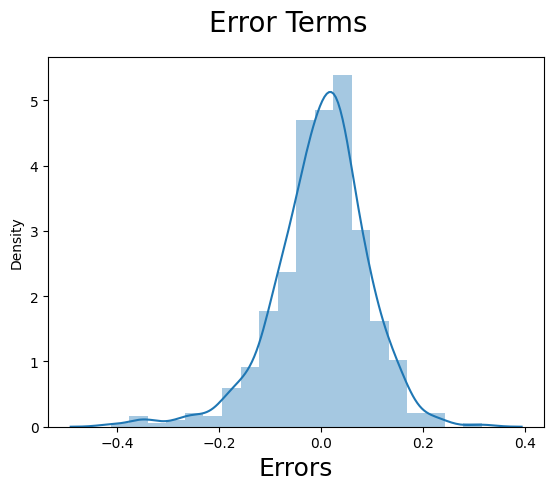

In [3661]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)    
plt.show()                     

From the histogram we can see they are normally distribute. We can go ahead and see how the model works with the test data set.

## Predictions using final model ##

Transform the test data set

In [3662]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [3663]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Mist,Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3664]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [3665]:
# Only taking the remaining columns in the final model
X_test_mod=X_test_mod[X.columns]

In [3666]:
X_test_mod=sm.add_constant(X_test_mod)

In [3667]:
y_pred_mod=lr20.predict(X_test_mod)

Plotting the test and predicted values.

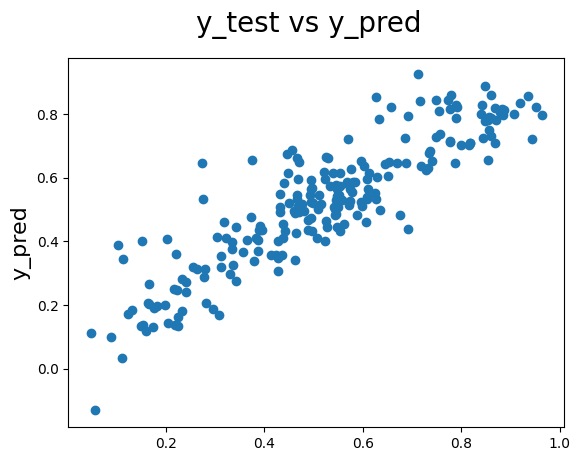

In [3668]:
fig = plt.figure()
plt.scatter(y_test, y_pred_mod)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.ylabel('y_pred', fontsize = 16)    
plt.show()  

Computing the final R2 score between test and predicted data

In [3669]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mod)

0.7955844377237249